In [1]:
from sklearn.ensemble import GradientBoostingClassifier

model_grad = GradientBoostingClassifier(n_estimators=100, max_depth=2, random_state=0)

In [3]:
from sklearn.datasets import make_gaussian_quantiles

X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=100, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

In [4]:
%%time
model_grad.fit(X, y)

Wall time: 47.9 ms


GradientBoostingClassifier(max_depth=2, random_state=0)

In [6]:
def plot_result(model, title="분류결과", legend=False, s=50):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))
    if isinstance(model, list):
        Y = model[0].predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
        for i in range(len(model) - 1):
            Y += model[i + 1].predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
    else:
        Y = model.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
    cs = plt.contourf(xx1, xx2, Y, cmap=plt.cm.Paired, alpha=0.5)
    for i, n, c in zip(range(2), "01", "br"):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=c, s=s, alpha=0.5, label="Class %s" % n)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.colorbar(cs)
    if legend:
        plt.legend()
    plt.grid(False)

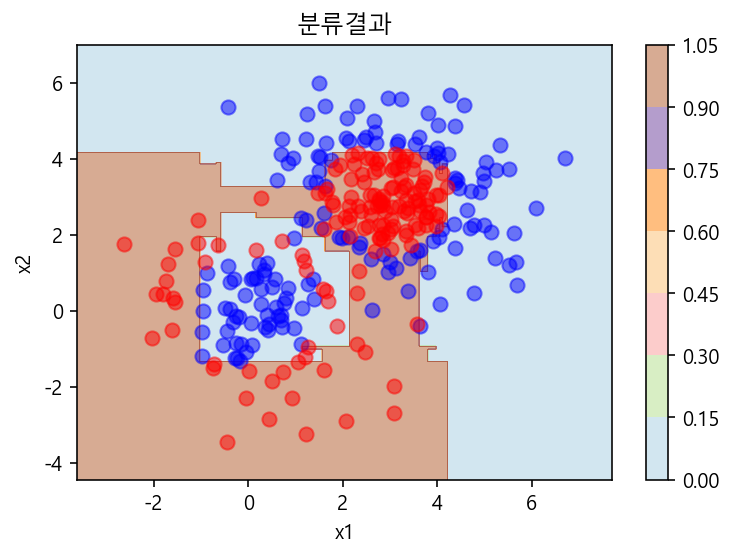

In [7]:
plot_result(model_grad)

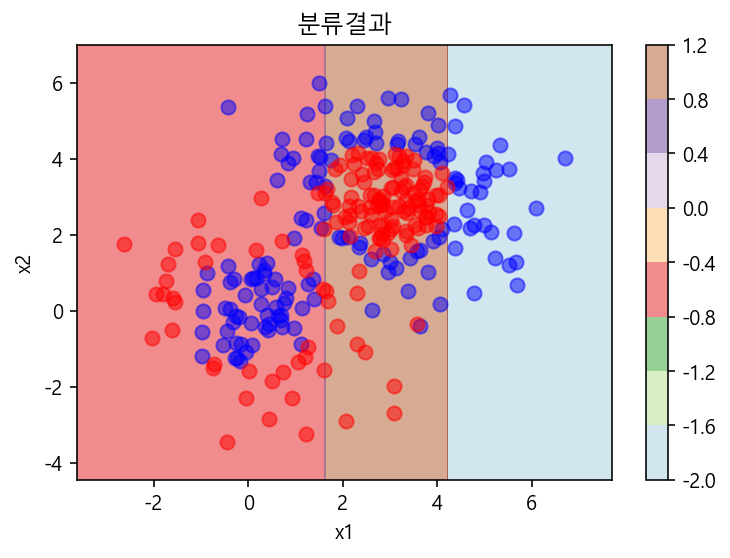

In [8]:
plot_result(model_grad.estimators_[0][0])

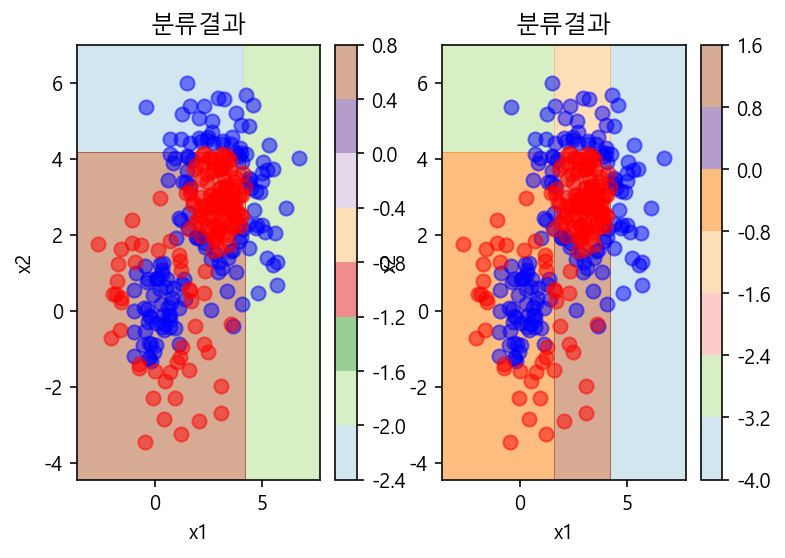

In [9]:
plt.subplot(121)
plot_result(model_grad.estimators_[1][0])
plt.subplot(122)
plot_result([model_grad.estimators_[0][0], model_grad.estimators_[1][0]])

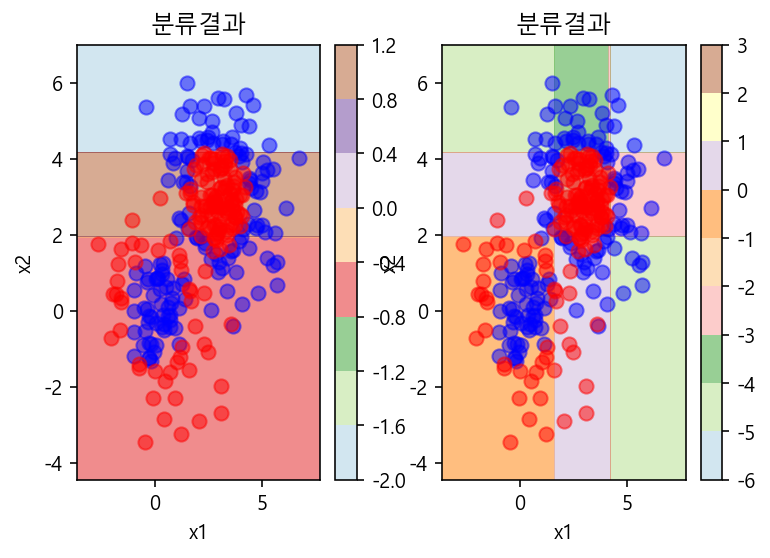

In [10]:
plt.subplot(121)
plot_result(model_grad.estimators_[2][0])
plt.subplot(122)
plot_result([model_grad.estimators_[0][0], 
             model_grad.estimators_[1][0],
             model_grad.estimators_[2][0]])

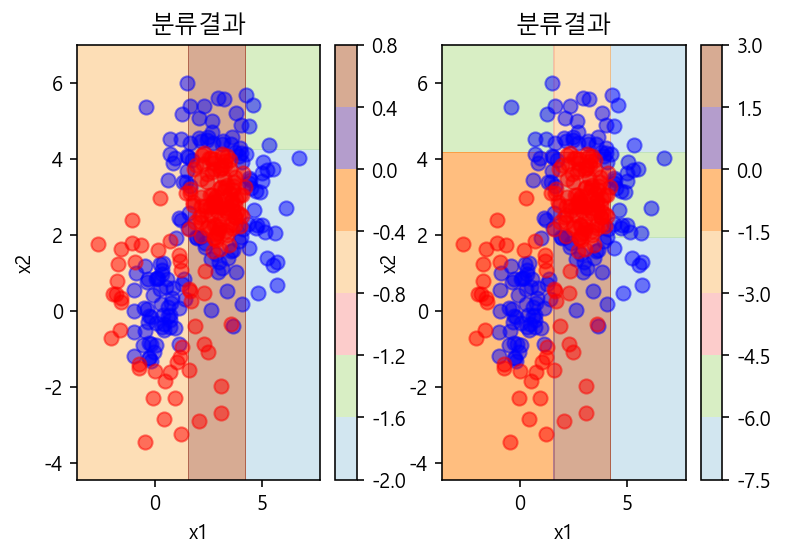

In [11]:
plt.subplot(121)
plot_result(model_grad.estimators_[3][0])
plt.subplot(122)
plot_result([model_grad.estimators_[0][0], 
             model_grad.estimators_[1][0],
             model_grad.estimators_[2][0],
             model_grad.estimators_[3][0]])

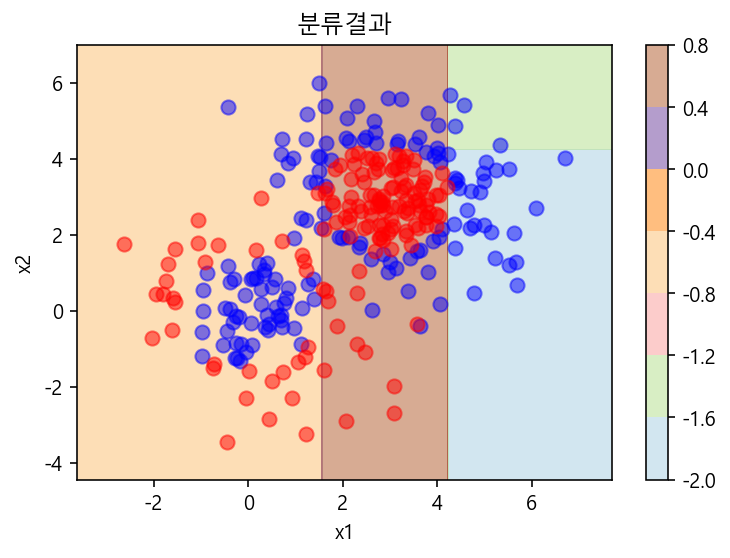

In [12]:
plot_result(model_grad.estimators_[3][0])

In [13]:
import xgboost

model_xgb = xgboost.XGBClassifier(n_estimators=100, max_depth=1, random_state=0)

In [14]:
%%time
model_xgb.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:43:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 897 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

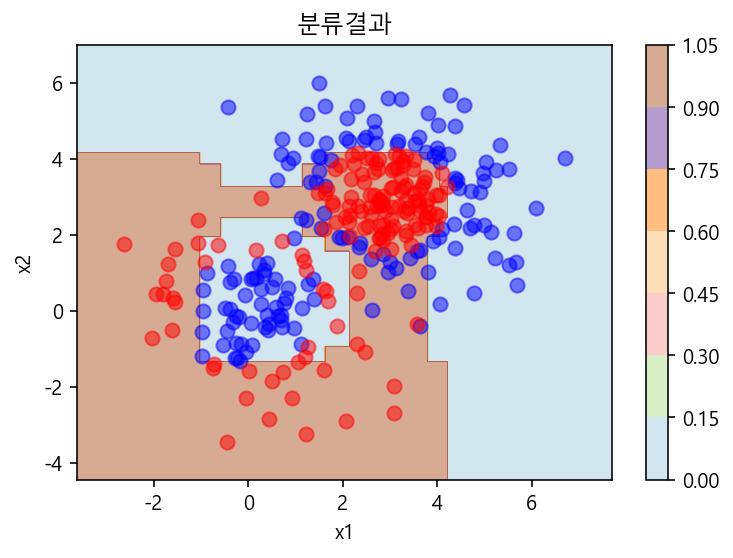

In [15]:
plot_result(model_xgb)

In [16]:
import lightgbm

model_lgbm = lightgbm.LGBMClassifier(n_estimators=100, max_depth=1, random_state=0)

In [17]:
%%time
model_lgbm.fit(X, y)

Wall time: 18.9 ms


LGBMClassifier(max_depth=1, random_state=0)

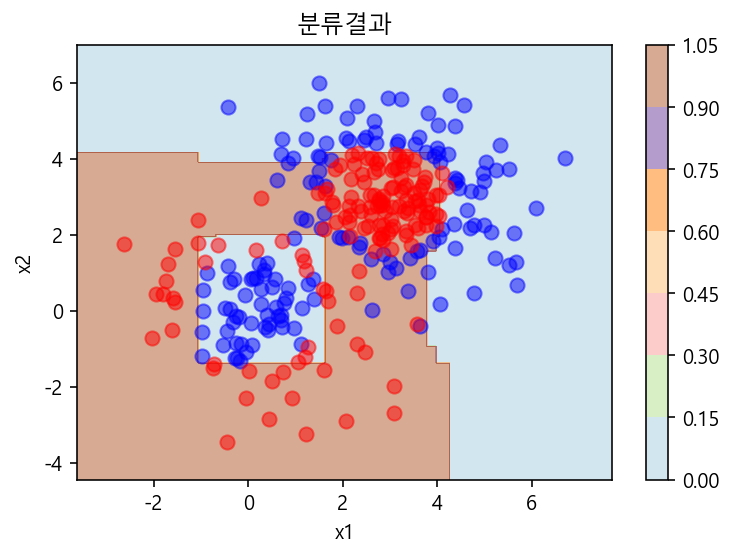

In [18]:
plot_result(model_lgbm)